# `multipagetiff` example

In [1]:
%load_ext autoreload
%autoreload 2 

In [42]:
import numpy as np
from matplotlib import pyplot as plt
import multipagetiff as tiff

## load a stack
Load a stack and display its frames.
The stack here is the 3D image of an actin filament imaged with a specle microscope ([M.Pascucci et al. 2019 Nat. Com.](https://www.nature.com/articles/s41467-019-09297-5.pdf?origin=ppub)).

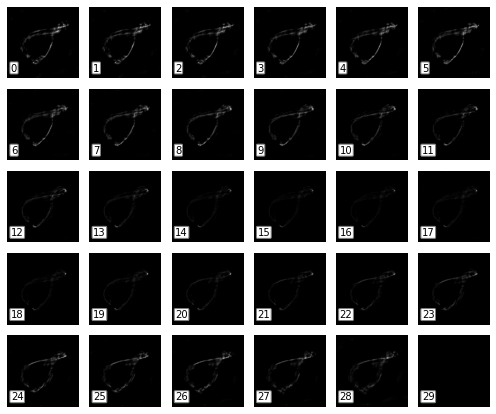

In [43]:
plt.figure(figsize=(7,7))
# Load the stack and define the resolution and the units
s = tiff.Stack("actin_filament.tif", dx=10, dz=50, units='nm')
# The frames to display can be specified with the frames parameter
# e.g. frames=range(5,15)
tiff.plot_frames(s, cmap='gray')

## z max-projection

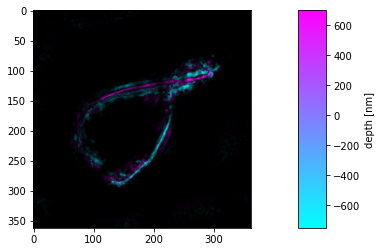

In [44]:
# set the colormap
tiff.set_cmap(plt.cm.cool)
# plot the stack
tiff.plot_flatten(s)


## Refine the image

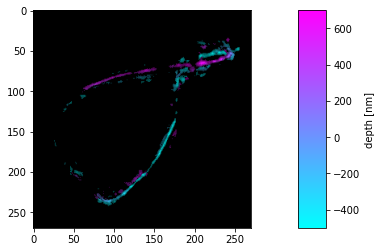

In [45]:
# set XY crop area
s.crop = [50,50,270,270]

# set Z range
s.set_start_in_units(-550)
s.set_end_in_units(700)

# plot with threshold
tiff.plot_flatten(s, threshold=0.25)

---

## Detailed example

In [16]:
st = tiff.Stack('Stack.tiff', dx=1, dz=1, z_label='depth', units='mm')

print("the stack has {} pages".format(len(st))) # number of frames

the stack has 3 pages


## plot a stack

Plot page by page. The Stack object behaves like a list, which elements are the frames

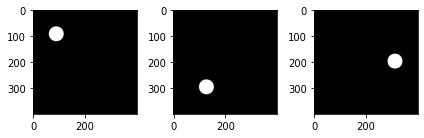

In [17]:
plt.subplot(1,3,1)
plt.imshow(st[0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(st[1], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(st[2], cmap='gray')
plt.tight_layout()

Display the frame of the stack with the plot_frames function

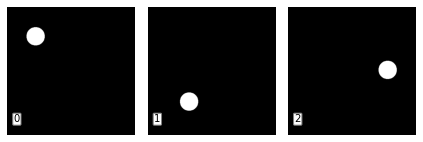

In [18]:
tiff.plot_frames(st, cmap='gray')

## color code

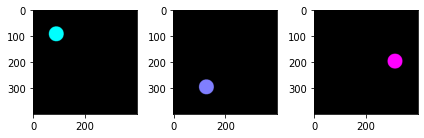

In [19]:
cc = tiff.color_code(st)

plt.subplot(1,3,1)
plt.imshow(cc[0])
plt.subplot(1,3,2)
plt.imshow(cc[1])
plt.subplot(1,3,3)
plt.imshow(cc[2])
plt.tight_layout()

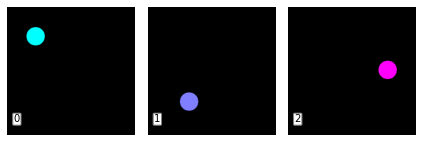

In [20]:
tiff.plot_frames(st, colorcoded=True)

## max projection

Create a color coded RGB image representing frame-depth. The image is the max projection of the color coded stack.

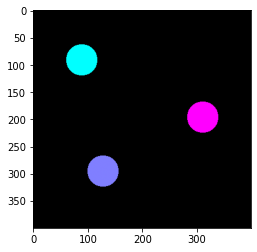

In [21]:
mp = tiff.flatten(st)
plt.imshow(mp)

plot the max projection, together with its colorbar

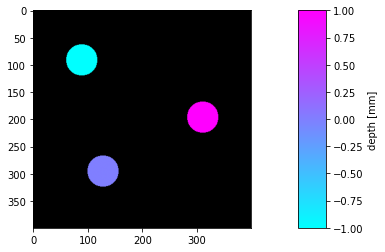

In [22]:
tiff.plot_flatten(st)

## change colormap

Use a matplotlib preset colormap

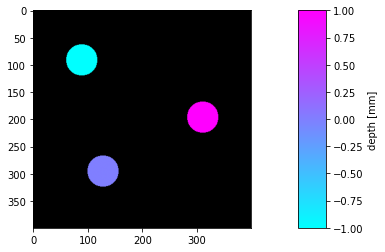

In [35]:
tiff.set_cmap(plt.cm.cool)
tiff.plot_flatten(st)

or define you own colormap

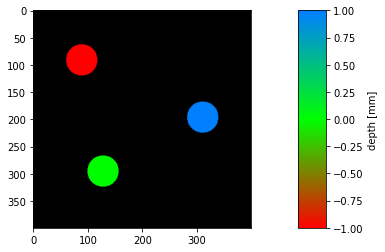

In [36]:
from matplotlib.colors import LinearSegmentedColormap

my_colors = [(1,0,0),(0,1,0),(0.0,0.5,1)]
my_cmap = LinearSegmentedColormap.from_list("myCmap", my_colors, N=256)
tiff.set_cmap(my_cmap)
tiff.plot_flatten(st)